In [151]:
from collections import defaultdict
import pandas as pd
import numpy as np
import sqlite3
import pdb
from tkinter import ON
import csv
import os
if not os.path.exists("images"):
    os.mkdir("images")

%matplotlib inline
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
pio.templates
import seaborn as sns

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

## Inpatient Descriptive Statistics 

In [152]:
inpatient_df = pd.read_csv('idea-1/medicare-data/medicare-data/Inpatient_provdr.csv')

In [153]:
inpatient_df.describe()

,Provider Id,Provider Zip Code,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
count,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000
mean,255569.865428,47938.121908,42.776304,36133.958434,9707.477867,8494.495174
std,151563.671767,27854.323080,51.104042,35065.365905,7664.642652,7309.467247
min,10001.000000,1040.000000,11.000000,2459.400000,2673.000000,1148.909091
25%,110092.000000,27261.000000,17.000000,15947.166670,5234.500000,4192.354839
50%,250007.000000,44309.000000,27.000000,25245.823530,7214.100000,6158.465116
75%,380075.000000,72901.000000,49.000000,43232.592590,11286.400000,10056.882350
max,670077.000000,99835.000000,3383.000000,929118.909100,156158.181800,154620.818200


In [154]:
inpatient_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 12 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   DRG Definition                              163065 non-null  object 
 1   Provider Id                                 163065 non-null  int64  
 2   Provider Name                               163065 non-null  object 
 3   Provider Street Address                     163065 non-null  object 
 4   Provider City                               163065 non-null  object 
 5   Provider State                              163065 non-null  object 
 6   Provider Zip Code                           163065 non-null  int64  
 7   Hospital Referral Region (HRR) Description  163065 non-null  object 
 8   Total Discharges                            163065 non-null  int64  
 9   Average Covered Charges                     163065 non-null  float64
 

In [155]:
inpatient_df.corr()

,Provider Id,Provider Zip Code,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
Provider Id,1.000000,-0.160237,0.000456,-0.112490,-0.040059,-0.044846
Provider Zip Code,-0.160237,1.000000,-0.071804,0.140658,0.027496,0.022262
Total Discharges,0.000456,-0.071804,1.000000,-0.020766,-0.016020,-0.021299
Average Covered Charges,-0.112490,0.140658,-0.020766,1.000000,0.774112,0.768927
Average Total Payments,-0.040059,0.027496,-0.016020,0.774112,1.000000,0.989362
Average Medicare Payments,-0.044846,0.022262,-0.021299,0.768927,0.989362,1.000000


## Inpatient Dataset Top 10 Analysis

<Figure size 2160x576 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Inpatient Provider in Top 10 Cities')

Text(0, 0.5, 'Count')

Text(0.5, 0, 'Provider City Id')

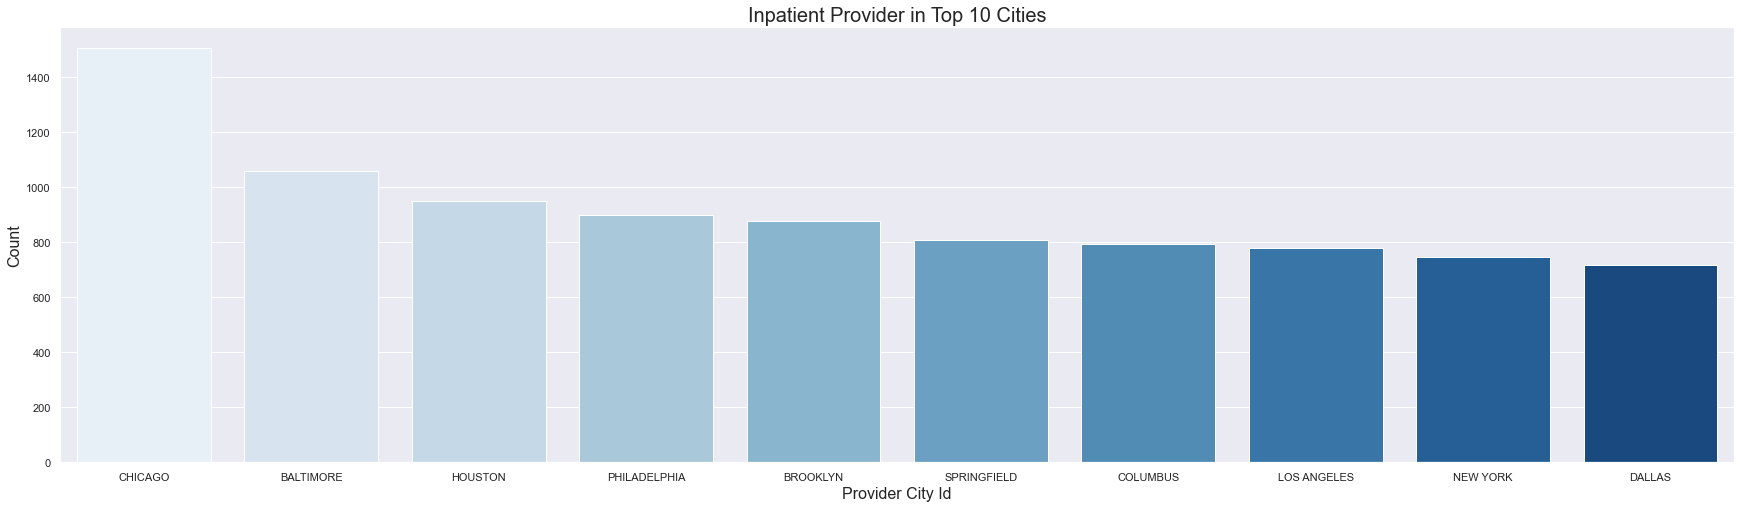

In [197]:
#Inpatient Provider City
city_count  = inpatient_df['Provider City'].value_counts()
city_count = city_count[:10,]

plt.figure(figsize=(30,8))

sns.barplot(x = city_count.index, y = city_count.values,  palette = "Blues")
plt.title('Inpatient Provider in Top 10 Cities', fontsize=20)
plt.ylabel('Count', fontsize=16)
plt.xlabel('Provider City Id', fontsize=16)
plt.show()

<Figure size 2160x576 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Inpatient Provider in Top 10 States')

Text(0, 0.5, 'Count')

Text(0.5, 0, 'States')

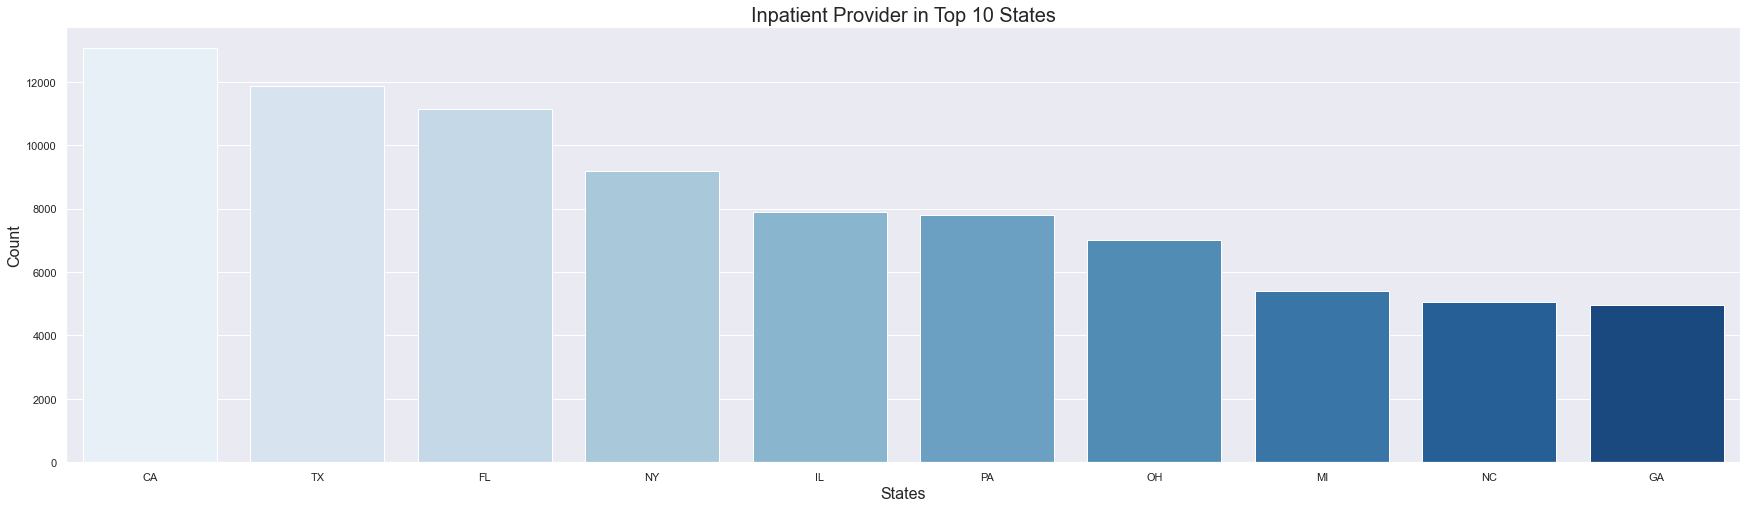

In [196]:
# Inpatient by State
state_count  = inpatient_df['Provider State'].value_counts()
state_count = state_count[:10,]

plt.figure(figsize=(30,8))

sns.barplot(x = state_count.index, y = state_count.values,  palette = "Blues")
plt.title('Inpatient Provider in Top 10 States', fontsize=20)
plt.ylabel('Count', fontsize=16)
plt.xlabel('States', fontsize=16)
plt.show()

<Figure size 2160x576 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Inpatient Provider in Top 10 Zip Codes')

Text(0, 0.5, 'Count')

Text(0.5, 0, 'Zip Codes')

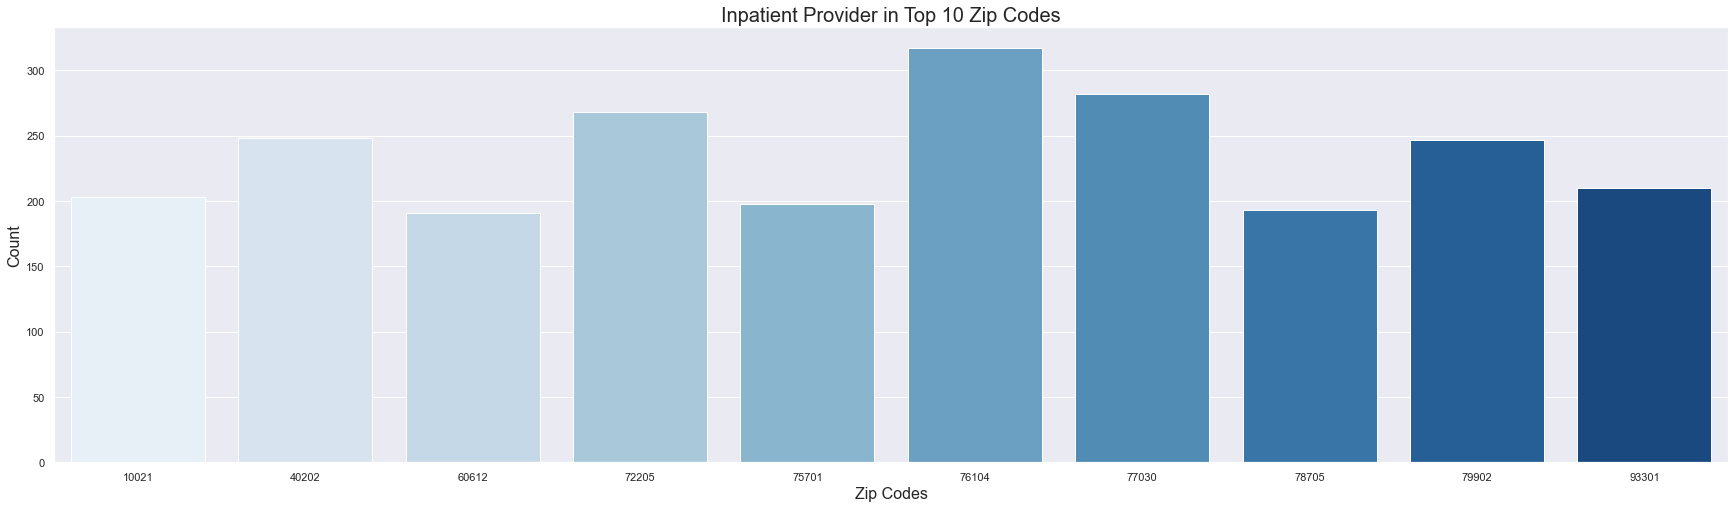

In [194]:
# Inpatient by Zip Code
zipcode_count  = inpatient_df['Provider Zip Code'].value_counts()
zipcode_count = zipcode_count[:10,]

plt.figure(figsize=(30,8))

sns.barplot(x = zipcode_count.index, y = zipcode_count.values,  palette = "Blues")
plt.title('Inpatient Provider in Top 10 Zip Codes', fontsize=20)
plt.ylabel('Count', fontsize=16)
plt.xlabel('Zip Codes', fontsize=16)
plt.show()


### Inpatient Top 10 Most Expensive Procedures

<Figure size 2160x576 with 0 Axes>

Text(0.5, 1.0, 'Inpatient Top 10 Most Expensive Cares')

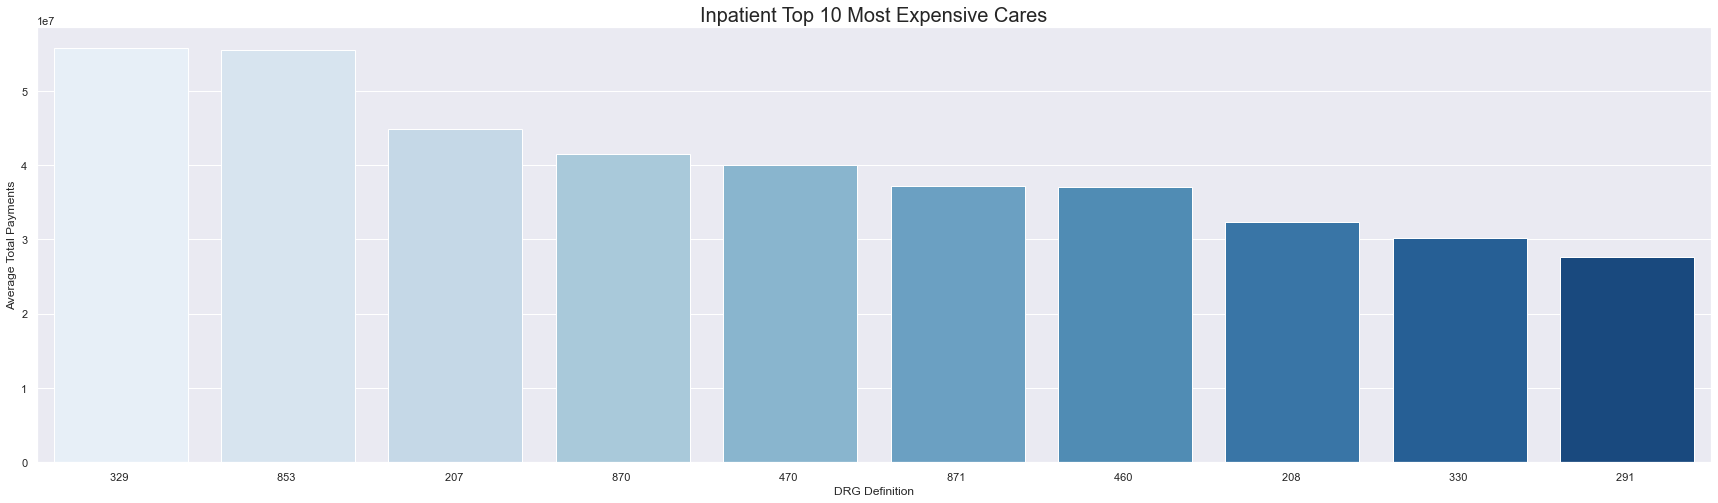

In [159]:
inp_group3 = inpatient_df.groupby('DRG Definition')['Average Total Payments'].sum().nlargest(10).reset_index()

DRG_Def = []
for i in inp_group3['DRG Definition']:
    DRG_Def.append(i[0:4])

inp = {'DRG Definition': DRG_Def, 'Average Total Payments': inp_group3['Average Total Payments']}
inpatient_top10 = pd.DataFrame(data=inp)

plt.figure(figsize=(30,8))
plt.title('Inpatient Top 10 Most Expensive Cares', fontdict = {'fontsize' : 20})
_=sns.barplot(data=inpatient_top10, x="DRG Definition", y="Average Total Payments", palette = "Blues")

plt.show()

## Inpatient Procedures Cost Among States

In [160]:
class SQLServer:
      def __init__(self, server):
        self.server = server
       
      def __enter__(self):
        self.conn: sqlite3.Connection = sqlite3.connect(self.server)
        self.cur: sqlite3.Cursor = self.conn.cursor() 
        return self
        
      def __exit__(self, exc_type, exc_val, exc_tb):
        self.conn.close()

In [ ]:
_df = pd.read_csv('idea-1/medicare-data/medicare-data/Inpatient_provdr.csv')
inpatient_hospital_charges = 'inpatient_hospital_charges.db'

with SQLServer('inpatient_hospital_charges') as db:
    _df.columns = [column.strip() for column in _df.columns]
    _df.to_sql('inpatient_hospital_charges', db.conn, if_exists='replace', index=False)

In [162]:
with SQLServer('inpatient_hospital_charges') as db:
    query = '''
SELECT `DRG Definition`, `Provider State` as providerState, t.maxAvgPaymentPerDRG
FROM inpatient_hospital_charges hc
INNER JOIN (
    SELECT `DRG Definition` as drg, MAX(`Average Total Payments`) as maxAvgPaymentPerDRG
    FROM inpatient_hospital_charges
    GROUP BY `DRG Definition`
) t
ON hc.`DRG Definition` == t.drg AND hc.`Average Total Payments` == t.maxAvgPaymentPerDRG
ORDER BY providerState ASC
'''
    cursor = db.cur.execute(query)
    results = [record for record in cursor]

In [163]:
_df = pd.DataFrame(results, columns=['DRG', 'ProviderState', 'Payment'])

In [164]:
with SQLServer('inpatient_hospital_charges') as db:
    ranking_by_drg = dict()
    for drg in inpatient_df['DRG Definition'].unique():

        query = """
            SELECT `Provider State` as providerState
            FROM inpatient_hospital_charges
            WHERE `DRG Definition` = '{drg}' 
            GROUP BY `Provider State`
            ORDER BY AVG(`Average Total Payments`) ASC
        """.format(drg=drg)
    
        cursor = db.cur.execute(query)
        ranking_by_drg[drg] = [record[0] for record in cursor]


In [165]:
for k,v in ranking_by_drg.items():
    while True:
        if len(v) >= 51:
            break
        v.append(None)

In [166]:
drg_by_id = {key.split(' - ')[0]: key for key in ranking_by_drg.keys()}
df_rank = pd.DataFrame(ranking_by_drg)

In [167]:
_df = pd.DataFrame(index=inpatient_df['Provider State'].unique())
for column in df_rank.columns:
    rankings_by_state = []

    if column in ['rank']:
        continue
        
    for rank, curr_state in zip(inpatient_df.index, df_rank[column]):
        rankings_by_state.append(curr_state)
    
    t = pd.DataFrame(rankings_by_state, columns=['State'])
    t['Rank'] = t.index
    t.set_index(['State'], inplace=True)
    
    _df = pd.merge(left=_df, right=t, how='left', left_index=True, right_index=True)
    
_df.columns = drg_by_id.keys()

In [168]:
_df.fillna(-100, inplace=True)
_df.head()

,039,057,064,065,066,069,074,101,149,176,...,812,853,870,871,872,885,897,917,918,948
AK,45,46,50,50,50,49.0,-100.0,49,-100.0,49,...,50,49,47.0,50,50,48.0,48,-100.0,49,50
AL,0,0,1,1,0,0.0,2.0,0,2.0,0,...,0,1,1.0,1,1,1.0,0,2.0,1,0
AR,3,4,3,2,2,1.0,5.0,3,1.0,1,...,3,0,0.0,0,2,2.0,1,6.0,0,1
AZ,36,29,33,33,34,36.0,22.0,34,27.0,35,...,36,25,25.0,38,37,34.0,8,23.0,27,28
CA,44,44,47,45,46,44.0,44.0,44,40.0,45,...,46,46,45.0,45,45,44.0,46,44.0,44,44


<Figure size 2160x1080 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Ranked Inpatient Cost Per Procedure')

Text(246.5, 0.5, 'State')

Text(0.5, 177.70399999999995, 'DRG Definition Id')

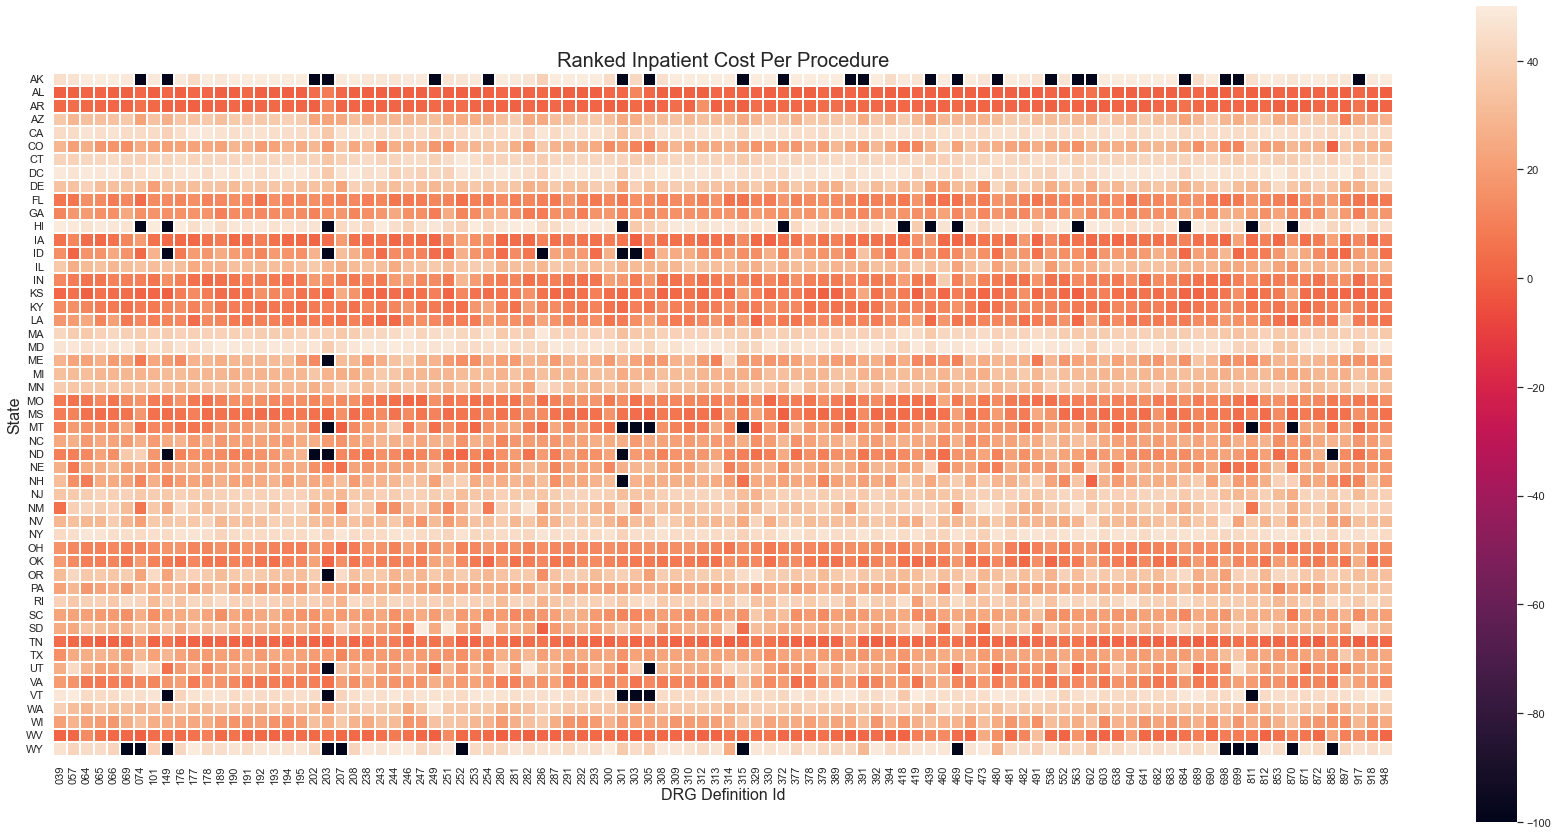

In [220]:
#darker shade = more expensive
plt.figure(figsize=(30,15))
sns.heatmap(_df, square=True, vmin=-100, cbar=True, linewidths=0.1)
plt.title('Ranked Inpatient Cost Per Procedure', fontsize=20)
plt.ylabel('State', fontsize=16)
plt.xlabel('DRG Definition Id', fontsize=16)
plt.show()


> _Ranked Inpatient Procedure Observations_
> * Arkansas (AK) is the state with the most expensive inpatient procedures (total = 22 at HIGH LEVEL).
> * Wyoming (WY) is the second state with the most expensive inpatient procedures (total = 13 at HIGH LEVEL).
> * Hawaii (HI) is the third state with the most expensive procedures (total = 12 at HIGH LEVEL).
> * MD, MA, NY, DC, CT, and CA have very low cost per inpatient procedures.Perhaps they have laws that cap-out procedures at certain prices due to political standings of the states on public health. 
> * Most of VT procedures are very low priced except for 149 (DYSEQUILIBRIUM), 203(BRONCHITIS & ASTHMA), 301(PERIPHERAL VASCULAR DISORDERS), 303(ATHEROSCLEROSIS), 305(HYPERTENSION), and 811(RED BLOOD CELL DISORDERS). Perhaps these procedures are more expensive for states as VT since these are almost all heart related diseases which need more treatments, more medications, and more diagnosis from doctors. 

## Cost Comparisons Among Different States for the same Procedures (top 3)

In [182]:
new_inp = inpatient_df[['Provider State', 'DRG Definition', 'Average Total Payments']]

### 1. Most Expensive: 390 - G.I. OBSTRUCTION W/O CC/MCC

<AxesSubplot:title={'center':'Cost Comparison Among Different States for the Same Procedure'}, xlabel='States', ylabel='Average Cost'>

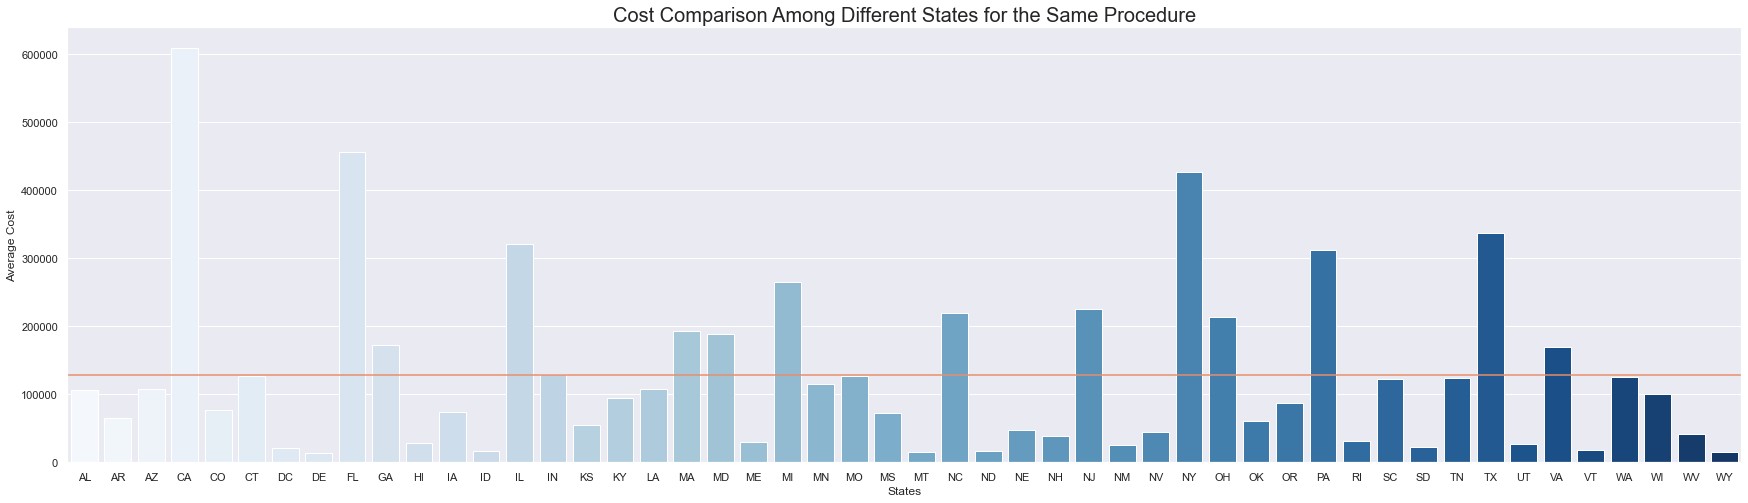

In [183]:
inp_group = new_inp[new_inp['DRG Definition'] == '390 - G.I. OBSTRUCTION W/O CC/MCC']
inp_pay = inp_group.groupby(by=['Provider State'])['Average Total Payments'].sum().reset_index()
a = np.array(inp_pay['Average Total Payments'])
a_mean = np.mean(a)
b = {'States': inp_pay['Provider State'], 'Average Cost': a}

procedure_cost = pd.DataFrame(data=b)
_=plt.figure(figsize=(30,8))
_=plt.axhline(a_mean)
_=plt.title('Cost Comparison Among Different States for the Same Procedure', fontdict={'fontsize' : 20})
sns.barplot(data=procedure_cost, x='States', y='Average Cost', palette="Blues")

### 2. Second most expensive: 853 - INFECTIOUS & PARASITIC DISEASES W O.R. PROCEDURE W MCC

<AxesSubplot:title={'center':'Cost Comparison Among Different States for the Same Procedure'}, xlabel='States', ylabel='Average Cost'>

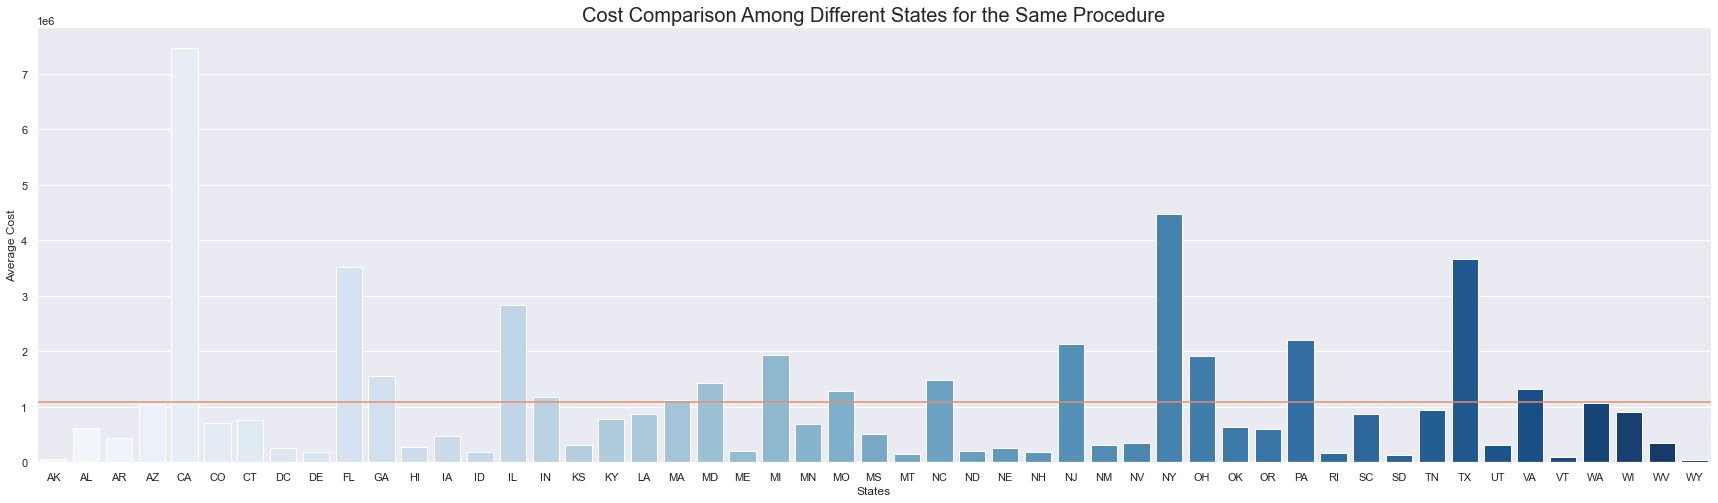

In [184]:
inp_group2 = new_inp[new_inp['DRG Definition'] == '853 - INFECTIOUS & PARASITIC DISEASES W O.R. PROCEDURE W MCC']
inp_pay2 = inp_group2.groupby(by=['Provider State'])['Average Total Payments'].sum().reset_index()
a = np.array(inp_pay2['Average Total Payments'])
a_mean = np.mean(a)
b = {'States': inp_pay2['Provider State'], 'Average Cost': a}

procedure_cost = pd.DataFrame(data=b)
_=plt.figure(figsize=(30,8))
_=plt.axhline(a_mean)
_=plt.title('Cost Comparison Among Different States for the Same Procedure', fontdict={'fontsize' : 20})
sns.barplot(data=procedure_cost, x='States', y='Average Cost', palette="Blues")

### 3. Third expensive procedure: 207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATOR SUPPORT 96+ HOURS

<AxesSubplot:title={'center':'Cost Comparison Among Different States for the Same Procedure'}, xlabel='States', ylabel='Average Cost'>

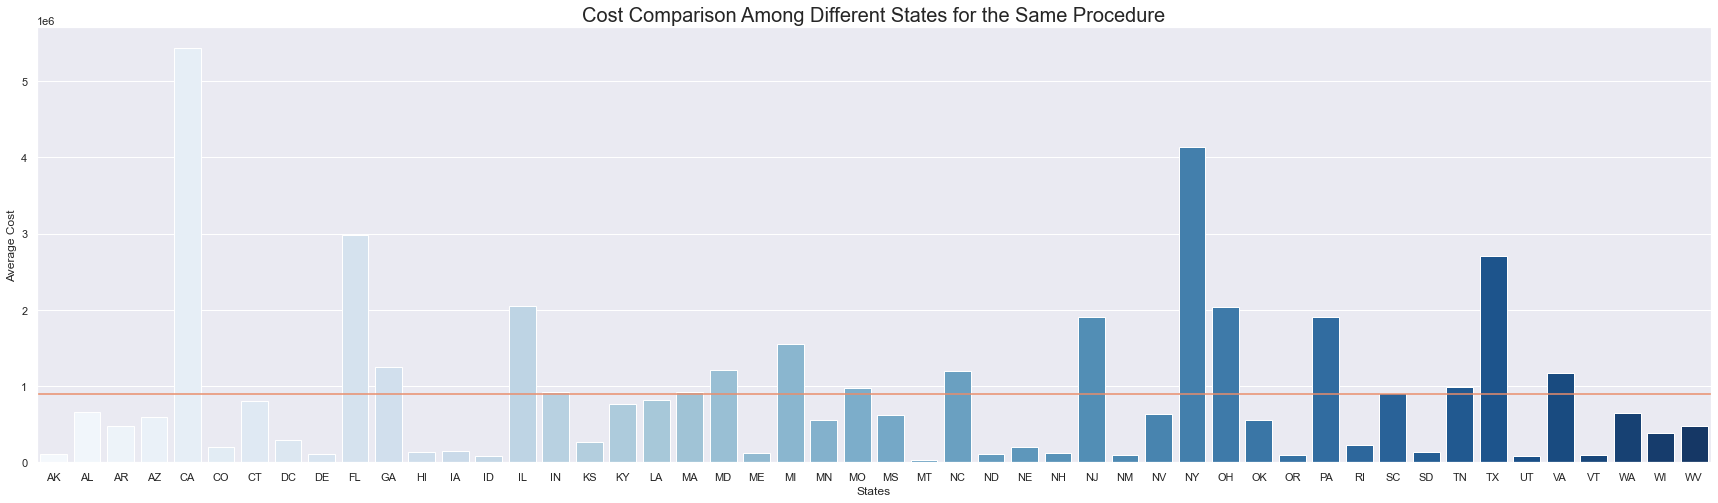

In [185]:
inp_group3 = new_inp[new_inp['DRG Definition'] == '207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATOR SUPPORT 96+ HOURS']
inp_pay3 = inp_group3.groupby(by=['Provider State'])['Average Total Payments'].sum().reset_index()
a = np.array(inp_pay3['Average Total Payments'])
a_mean = np.mean(a)
b = {'States': inp_pay3['Provider State'], 'Average Cost': a}

procedure_cost = pd.DataFrame(data=b)
_=plt.figure(figsize=(30,8))
_=plt.axhline(a_mean)
_=plt.title('Cost Comparison Among Different States for the Same Procedure', fontdict={'fontsize' : 20})
sns.barplot(data=procedure_cost, x='States', y='Average Cost', palette="Blues")

## Top 5 Most Common Procedures 

In [189]:
top_5_count  = inpatient_df['DRG Definition'].value_counts()
top_5_count = top_5_count[:5,]
print(top_5_count)

194 - SIMPLE PNEUMONIA & PLEURISY W CC                                      3023
690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC                             2989
292 - HEART FAILURE & SHOCK W CC                                            2953
392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC                2950
641 - MISC DISORDERS OF NUTRITION,METABOLISM,FLUIDS/ELECTROLYTES W/O MCC    2899
Name: DRG Definition, dtype: int64


### Digging Dipper Into Top Common Procedure

In [190]:
#select top DRG from above list
selected_top_drg =  drg_by_id['194']
select_provider_id = None
selected_top_drg

'194 - SIMPLE PNEUMONIA & PLEURISY W CC'

In [212]:
df_194 = inpatient_df[inpatient_df['DRG Definition'] == selected_top_drg]
df_194.loc[:, 'Provider State'] = df_194.loc[:, 'Provider State'].astype('category')
groupby_state = df_194.groupby(by='Provider State').agg(['mean', 'min', 'max'])
groupby_state.reset_index(inplace=True)

In [213]:
# Analyze top 5 states for 194 - SIMPLE PNEUMONIA & PLEURISY W CC
groupby_state.head(5)

Provider State   Provider Id               Provider Zip Code                \
                          mean    min    max              mean    min    max   
0             AK  20014.000000  20001  20026      99613.750000  99508  99801   
1             AL  10075.108434  10001  10169      35948.349398  35007  36854   
2             AR  40052.046512  40001  40137      72295.116279  71603  72956   
3             AZ  30070.226415  30002  30128      85560.792453  85006  86504   
4             CA  50330.048387  50002  50765      93055.629032  90004  96158   

  Total Discharges          Average Covered Charges                \
              mean min  max                    mean           min   
0        40.000000  13   68            23996.701344   8332.619048   
1        53.204819  11  164            21155.106543   5637.750000   
2        70.906977  12  165            19415.070320   5392.322581   
3        58.339623  11  194            26476.860267   8489.538462   
4        52.689516  11  220            45776.798484  12403.538460   

                Average Total Payments                             \
            max                   mean          min           max   
0   33906.61538           10842.989128  7938.307692  13980.133330   
1   80879.27586            5904.580256  4881.704545   8177.204545   
2   41771.51471            5987.234335  5198.000000   9243.405660   
3   74192.52273            7493.559836  5506.933333  12066.600000   
4  110577.28330            8865.394994  5716.454545  23257.214290   

  Average Medicare Payments                             
                       mean          min           max  
0               9782.759702  6063.615385  13079.866670  
1               4843.720992  3741.048780   7271.363636  
2               4990.275134  4275.500000   7846.047170  
3               6313.230518  4277.947368  11016.466670  
4               7829.309369  5110.636364  22376.928570

<Figure size 2160x576 with 0 Axes>

<AxesSubplot:xlabel='Provider State', ylabel='Average Total Payments'>

Text(0.5, 1.0, 'Avg. Cost and 95% CI for DRG = 194 - SIMPLE PNEUMONIA & PLEURISY W CC')

Text(0.5, 0, 'Average Cost ($)')

Text(0.5, 0, 'Provider State')

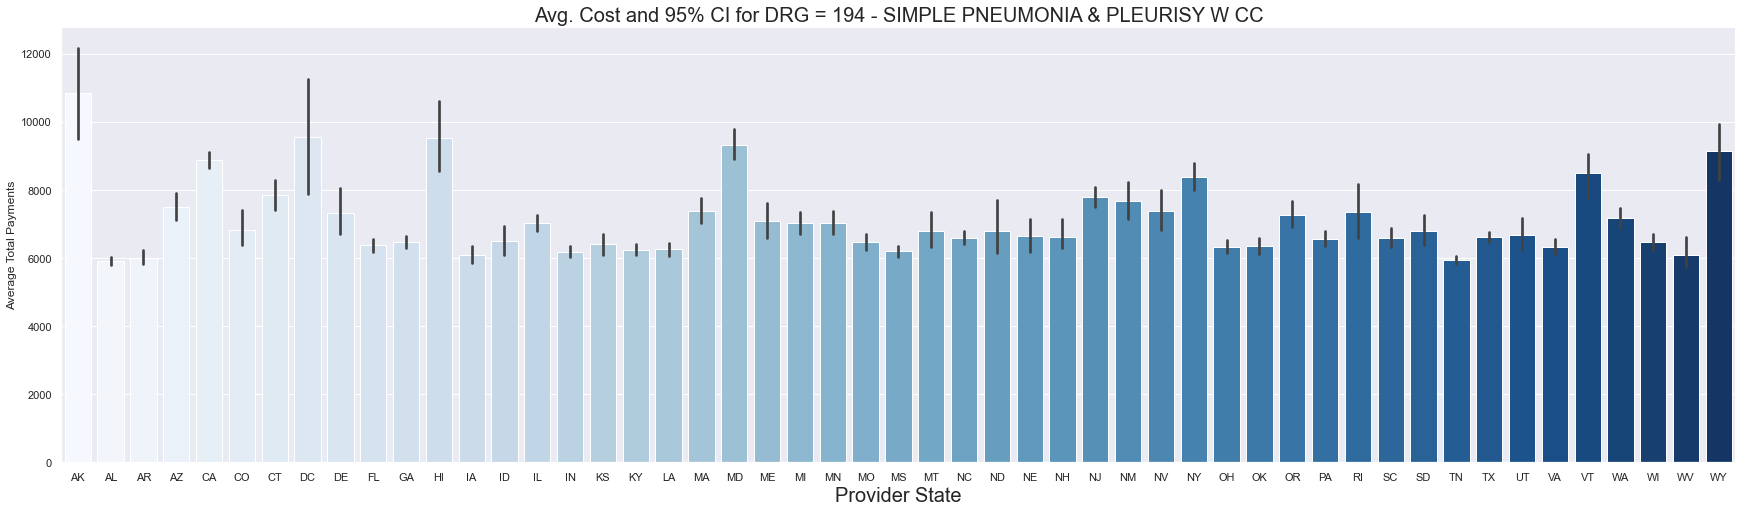

In [214]:
plt.figure(figsize=(30,8))

sns.barplot(x='Provider State', y='Average Total Payments', palette = "Blues", data=df_194)
plt.title('Avg. Cost and 95% CI for DRG = {}'.format(selected_top_drg), fontsize=20)
plt.xlabel('Average Cost ($)', fontsize=20)
plt.xlabel('Provider State', fontsize=20)

> _Top Most Common Procedure Observations_
> * Arkansas (AK) is the state with the highest average cost for inpatient procedure 194 - SIMPLE PNEUMONIA & PLEURISY W CC.
> * Alabama (AL) is the state with the lowest average cost for inpatient procedure 194 - SIMPLE PNEUMONIA & PLEURISY W CC.
> * Most states average for inpatient procedure 194 - SIMPLE PNEUMONIA & PLEURISY W CC is around 6000 - 8000 dollars.